In [523]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime
import pmdarima as pm
from pmdarima.utils import diff
from sklearn.metrics import mean_squared_error
from pmdarima.metrics import smape
import pickle

In [495]:
df = pd.read_csv('./allhomes_census_merged.csv')

In [496]:
df.rename(columns = {'ZRI':'zri'}, inplace = True)

In [497]:
df['zip'] = df['zip'].map(lambda x: str(x))

In [498]:
df['zip'].map(lambda x: len(x)).value_counts()

5    1017900
4     114696
Name: zip, dtype: int64

In [500]:
df['zip'] = df['zip'].map(lambda x: '0' + x if len(x)<5 else x)

In [501]:
df['zip'].map(lambda x: len(x)).value_counts()

5    1132596
Name: zip, dtype: int64

In [502]:
df['datetime']=df['datetime'].map(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [610]:
df

,zip,year,month,City,State,Metro,CountyName,zri,year_from,nonfamily_households,...,speak_only_english_at_home,speak_spanish_at_home,speak_spanish_at_home_low_english,pop_15_and_over,pop_never_married,pop_now_married,pop_separated,pop_widowed,pop_divorced,datetime
0,01001,2011,2,Agawam,MA,Springfield,Hampden County,1178.0,2007.0,2887.0,...,14482.0,333.0,72.0,13921.0,4096.0,6153.0,309.0,1214.0,1937.0,2011-02-01
1,01001,2011,3,Agawam,MA,Springfield,Hampden County,1176.0,2007.0,2887.0,...,14482.0,333.0,72.0,13921.0,4096.0,6153.0,309.0,1214.0,1937.0,2011-03-01
2,01001,2011,4,Agawam,MA,Springfield,Hampden County,1207.0,2007.0,2887.0,...,14482.0,333.0,72.0,13921.0,4096.0,6153.0,309.0,1214.0,1937.0,2011-04-01
3,01001,2011,5,Agawam,MA,Springfield,Hampden County,1234.0,2007.0,2887.0,...,14482.0,333.0,72.0,13921.0,4096.0,6153.0,309.0,1214.0,1937.0,2011-05-01
4,01001,2011,6,Agawam,MA,Springfield,Hampden County,1258.0,2007.0,2887.0,...,14482.0,333.0,72.0,13921.0,4096.0,6153.0,309.0,1214.0,1937.0,2011-06-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1132591,99709,2019,9,Fairbanks,AK,Fairbanks,Fairbanks North Star Borough,1519.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-01
1132592,99709,2019,10,Fairbanks,AK,Fairbanks,Fairbanks North Star Borough,1508.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-10-01
1132593,99709,2019,11,Fairbanks,AK,Fairbanks,Fairbanks North Star Borough,1503.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-11-01
1132594,99709,2019,12,Fairbanks,AK,Fairbanks,Fairbanks North Star Borough,1482.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-01


In [612]:
# with open('./ts_df.pickle', mode = 'wb') as file:
#     pickle.dump(df, file)
#     file.close()

In [679]:
train = df[df['year'] <= 2018]

In [680]:
test = df[df['year'] == 2019]

In [681]:
ytrain = pd.concat([train['zip'], train['datetime'], train['zri']], axis = 1)

In [682]:
ytrain['zip'].nunique()

10487

In [683]:
ytrain

,zip,datetime,zri
0,01001,2011-02-01,1178.0
1,01001,2011-03-01,1176.0
2,01001,2011-04-01,1207.0
3,01001,2011-05-01,1234.0
4,01001,2011-06-01,1258.0
...,...,...,...
1132578,99709,2018-08-01,1518.0
1132579,99709,2018-09-01,1503.0
1132580,99709,2018-10-01,1495.0
1132581,99709,2018-11-01,1500.0


In [684]:
zips = ytrain['zip'].unique()

In [685]:
zips

array(['01001', '01002', '01005', ..., '99701', '99705', '99709'],
      dtype=object)

# Trying to make a model for every zip code
Probably don't run the commented cells

In [518]:
arima = pm.arima.auto_arima

In [605]:
len(ts_dict['01001'])

83

In [609]:
ts_dict['01001']

datetime
2011-02-01    1178.0
2011-03-01    1176.0
2011-04-01    1207.0
2011-05-01    1234.0
2011-06-01    1258.0
               ...  
2017-08-01    1421.0
2017-09-01    1410.0
2017-10-01    1391.0
2017-11-01    1359.0
2017-12-01    1351.0
Name: zri, Length: 83, dtype: float64

In [529]:
# save ts_dict as pickle to avoid runtime of splitting
# with open('./ts_dict.pickle', mode = 'wb') as file:
#     pickle.dump(ts_dict, file)
#     file.close()

In [530]:
# with open('./ts_dict.pickle', mode = 'rb') as file:
#     asdf = pickle.load(file)

In [593]:
models_dict = {}

In [594]:
# start = datetime.now()
# for item in zips:
#     curr_model = arima(ts_dict[item], start_p=0, start_q=0, m=12)
#     models_dict[item] = (curr_model.order, curr_model.seasonal_order)
# elapsed = datetime.now() - start
# print(elapsed)

C:\Users\fayma\anaconda3\envs\env1\lib\site-packages\pmdarima\arima\_auto_solvers.py:522: ModelFitWarning:

Error fitting  ARIMA(2,0,0)(0,0,0)[12]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "C:\Users\fayma\anaconda3\envs\env1\lib\site-packages\pmdarima\arima\_auto_solvers.py", line 506, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "C:\Users\fayma\anaconda3\envs\env1\lib\site-packages\pmdarima\arima\arima.py", line 482, in fit
    self._fit(y, X, **fit_args)
  File "C:\Users\fayma\anaconda3\envs\env1\lib\site-packages\pmdarima\arima\arima.py", line 403, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "C:\Users\fayma\anaconda3\envs\env1\lib\site-packages\pmdarima\arima\arima.py", line 393, in _fit_wrapper
    return arima, arima.fit(start_params=start_params,
  File "C:\Users\fayma\anaconda3\envs\env1\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py", line 

C:\Users\fayma\anaconda3\envs\env1\lib\site-packages\pmdarima\arima\_auto_solvers.py:522: ModelFitWarning:

Error fitting  ARIMA(2,0,0)(1,0,0)[12] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "C:\Users\fayma\anaconda3\envs\env1\lib\site-packages\pmdarima\arima\_auto_solvers.py", line 506, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "C:\Users\fayma\anaconda3\envs\env1\lib\site-packages\pmdarima\arima\arima.py", line 482, in fit
    self._fit(y, X, **fit_args)
  File "C:\Users\fayma\anaconda3\envs\env1\lib\site-packages\pmdarima\arima\arima.py", line 403, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "C:\Users\fayma\anaconda3\envs\env1\lib\site-packages\pmdarima\arima\arima.py", line 393, in _fit_wrapper
    return arima, arima.fit(start_params=start_params,
  File "C:\Users\fayma\anaconda3\envs\env1\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py", line 

C:\Users\fayma\anaconda3\envs\env1\lib\site-packages\pmdarima\arima\_auto_solvers.py:522: ModelFitWarning:

Error fitting  ARIMA(3,0,1)(1,0,0)[12] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "C:\Users\fayma\anaconda3\envs\env1\lib\site-packages\pmdarima\arima\_auto_solvers.py", line 506, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "C:\Users\fayma\anaconda3\envs\env1\lib\site-packages\pmdarima\arima\arima.py", line 482, in fit
    self._fit(y, X, **fit_args)
  File "C:\Users\fayma\anaconda3\envs\env1\lib\site-packages\pmdarima\arima\arima.py", line 403, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "C:\Users\fayma\anaconda3\envs\env1\lib\site-packages\pmdarima\arima\arima.py", line 393, in _fit_wrapper
    return arima, arima.fit(start_params=start_params,
  File "C:\Users\fayma\anaconda3\envs\env1\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py", line 

C:\Users\fayma\anaconda3\envs\env1\lib\site-packages\pmdarima\arima\_auto_solvers.py:522: ModelFitWarning:

Error fitting  ARIMA(4,0,0)(1,0,0)[12] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "C:\Users\fayma\anaconda3\envs\env1\lib\site-packages\pmdarima\arima\_auto_solvers.py", line 506, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "C:\Users\fayma\anaconda3\envs\env1\lib\site-packages\pmdarima\arima\arima.py", line 482, in fit
    self._fit(y, X, **fit_args)
  File "C:\Users\fayma\anaconda3\envs\env1\lib\site-packages\pmdarima\arima\arima.py", line 403, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "C:\Users\fayma\anaconda3\envs\env1\lib\site-packages\pmdarima\arima\arima.py", line 393, in _fit_wrapper
    return arima, arima.fit(start_params=start_params,
  File "C:\Users\fayma\anaconda3\envs\env1\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py", line 

C:\Users\fayma\anaconda3\envs\env1\lib\site-packages\pmdarima\arima\_auto_solvers.py:522: ModelFitWarning:

Error fitting  ARIMA(2,0,0)(1,0,0)[12] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "C:\Users\fayma\anaconda3\envs\env1\lib\site-packages\pmdarima\arima\_auto_solvers.py", line 506, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "C:\Users\fayma\anaconda3\envs\env1\lib\site-packages\pmdarima\arima\arima.py", line 482, in fit
    self._fit(y, X, **fit_args)
  File "C:\Users\fayma\anaconda3\envs\env1\lib\site-packages\pmdarima\arima\arima.py", line 403, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "C:\Users\fayma\anaconda3\envs\env1\lib\site-packages\pmdarima\arima\arima.py", line 393, in _fit_wrapper
    return arima, arima.fit(start_params=start_params,
  File "C:\Users\fayma\anaconda3\envs\env1\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py", line 

C:\Users\fayma\anaconda3\envs\env1\lib\site-packages\pmdarima\arima\_auto_solvers.py:522: ModelFitWarning:

Error fitting  ARIMA(2,1,1)(2,0,1)[12]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "C:\Users\fayma\anaconda3\envs\env1\lib\site-packages\pmdarima\arima\_auto_solvers.py", line 506, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "C:\Users\fayma\anaconda3\envs\env1\lib\site-packages\pmdarima\arima\arima.py", line 482, in fit
    self._fit(y, X, **fit_args)
  File "C:\Users\fayma\anaconda3\envs\env1\lib\site-packages\pmdarima\arima\arima.py", line 403, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "C:\Users\fayma\anaconda3\envs\env1\lib\site-packages\pmdarima\arima\arima.py", line 393, in _fit_wrapper
    return arima, arima.fit(start_params=start_params,
  File "C:\Users\fayma\anaconda3\envs\env1\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py", line 

C:\Users\fayma\anaconda3\envs\env1\lib\site-packages\pmdarima\arima\_auto_solvers.py:522: ModelFitWarning:

Error fitting  ARIMA(2,1,1)(1,0,1)[12] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "C:\Users\fayma\anaconda3\envs\env1\lib\site-packages\pmdarima\arima\_auto_solvers.py", line 506, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "C:\Users\fayma\anaconda3\envs\env1\lib\site-packages\pmdarima\arima\arima.py", line 482, in fit
    self._fit(y, X, **fit_args)
  File "C:\Users\fayma\anaconda3\envs\env1\lib\site-packages\pmdarima\arima\arima.py", line 403, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "C:\Users\fayma\anaconda3\envs\env1\lib\site-packages\pmdarima\arima\arima.py", line 393, in _fit_wrapper
    return arima, arima.fit(start_params=start_params,
  File "C:\Users\fayma\anaconda3\envs\env1\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py", line 

C:\Users\fayma\anaconda3\envs\env1\lib\site-packages\pmdarima\arima\_auto_solvers.py:522: ModelFitWarning:

Error fitting  ARIMA(2,1,1)(0,0,0)[12]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "C:\Users\fayma\anaconda3\envs\env1\lib\site-packages\pmdarima\arima\_auto_solvers.py", line 506, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "C:\Users\fayma\anaconda3\envs\env1\lib\site-packages\pmdarima\arima\arima.py", line 482, in fit
    self._fit(y, X, **fit_args)
  File "C:\Users\fayma\anaconda3\envs\env1\lib\site-packages\pmdarima\arima\arima.py", line 403, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "C:\Users\fayma\anaconda3\envs\env1\lib\site-packages\pmdarima\arima\arima.py", line 393, in _fit_wrapper
    return arima, arima.fit(start_params=start_params,
  File "C:\Users\fayma\anaconda3\envs\env1\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py", line 

C:\Users\fayma\anaconda3\envs\env1\lib\site-packages\pmdarima\arima\_auto_solvers.py:522: ModelFitWarning:

Error fitting  ARIMA(3,0,0)(2,0,0)[12] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "C:\Users\fayma\anaconda3\envs\env1\lib\site-packages\pmdarima\arima\_auto_solvers.py", line 506, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "C:\Users\fayma\anaconda3\envs\env1\lib\site-packages\pmdarima\arima\arima.py", line 482, in fit
    self._fit(y, X, **fit_args)
  File "C:\Users\fayma\anaconda3\envs\env1\lib\site-packages\pmdarima\arima\arima.py", line 403, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "C:\Users\fayma\anaconda3\envs\env1\lib\site-packages\pmdarima\arima\arima.py", line 393, in _fit_wrapper
    return arima, arima.fit(start_params=start_params,
  File "C:\Users\fayma\anaconda3\envs\env1\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py", line 

KeyboardInterrupt: 

In [619]:
len(models_dict)

2836

In [622]:
len(ts_dict)

10487

In [597]:
(models_dict)

{'01001': ((1, 1, 0), (0, 0, 0, 12)),
 '01002': ((2, 1, 1), (0, 0, 0, 12)),
 '01005': ((2, 1, 1), (0, 0, 0, 12)),
 '01007': ((2, 0, 0), (0, 0, 0, 12)),
 '01010': ((2, 0, 1), (0, 0, 1, 12)),
 '01013': ((2, 1, 0), (2, 0, 0, 12)),
 '01020': ((3, 1, 0), (0, 0, 0, 12)),
 '01027': ((1, 1, 0), (0, 0, 0, 12)),
 '01028': ((2, 1, 1), (0, 0, 1, 12)),
 '01030': ((1, 1, 0), (0, 0, 0, 12)),
 '01033': ((1, 1, 0), (0, 0, 0, 12)),
 '01040': ((2, 1, 1), (0, 0, 0, 12)),
 '01056': ((1, 1, 0), (0, 0, 0, 12)),
 '01057': ((4, 1, 0), (0, 0, 0, 12)),
 '01060': ((4, 1, 0), (0, 0, 0, 12)),
 '01062': ((2, 1, 1), (0, 0, 0, 12)),
 '01069': ((2, 1, 1), (0, 0, 0, 12)),
 '01073': ((2, 0, 0), (0, 0, 0, 12)),
 '01075': ((2, 1, 1), (0, 0, 0, 12)),
 '01077': ((2, 0, 0), (0, 0, 0, 12)),
 '01083': ((3, 1, 0), (0, 0, 0, 12)),
 '01085': ((2, 1, 1), (0, 0, 0, 12)),
 '01089': ((2, 1, 1), (0, 0, 1, 12)),
 '01095': ((2, 0, 0), (0, 0, 0, 12)),
 '01104': ((2, 1, 1), (0, 0, 0, 12)),
 '01105': ((2, 1, 1), (0, 0, 0, 12)),
 '01106': ((

# Example of one model on zip 27518

Found good guidelines on what (p, d, q) mean and how to interpret them here:
https://towardsdatascience.com/time-series-forecasting-arima-models-7f221e9eee06

In [697]:
df3 = train[train['zip']=='27518'].loc[:,['zri', 'datetime']]
# filter for a random zip code and make a time series dataframe

In [698]:
df3

,zri,datetime
304128,955.0,2011-02-01
304129,938.0,2011-03-01
304130,932.0,2011-04-01
304131,923.0,2011-05-01
304132,923.0,2011-06-01
...,...,...
304218,1338.0,2018-08-01
304219,1354.0,2018-09-01
304220,1361.0,2018-10-01
304221,1370.0,2018-11-01


In [699]:
fig = px.line(df3, x = 'datetime', y = 'zri')
fig
# stationarity is a requirement for arima
# stationary time series = the mean does not change over time
# if there is an overall trend in the time-series you take differences

C:\Users\fayma\anaconda3\envs\env1\lib\site-packages\pmdarima\utils\visualization.py:219: FutureWarning:

the 'unbiased'' keyword is deprecated, use 'adjusted' instead



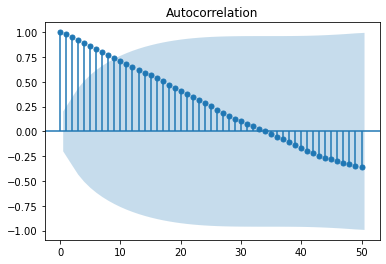

In [700]:
pm.plot_acf(df3['zri'], lags = 50, alpha = 0.05)

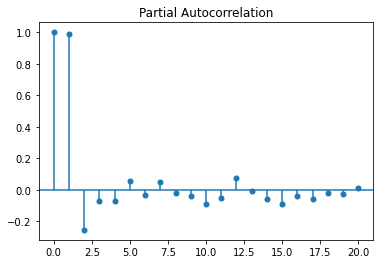

In [701]:
pm.plot_pacf(df3['zri'], lags = 20)

In [702]:
# pmdarima comes with a function to difference a time-series for you
zri_dif = pm.arima.utils.diff(df3['zri'], 1, 1) # lag = 1 and number of differences = 1

In [709]:
dif1 = df3.copy().iloc[1:,:] # drop 1st row bc first row always becomes nan when differencing

In [711]:
dif1['zri']=zri_dif

In [712]:
fig = px.line(dif1, x = 'datetime', y = 'zri')
fig
# now looks approximately stationary centered around 0

C:\Users\fayma\anaconda3\envs\env1\lib\site-packages\pmdarima\utils\visualization.py:219: FutureWarning:

the 'unbiased'' keyword is deprecated, use 'adjusted' instead



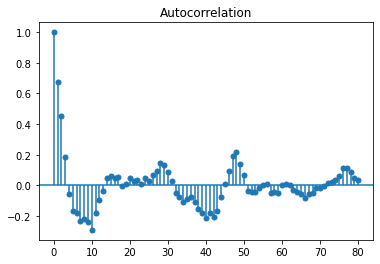

In [713]:
pm.plot_acf(dif1['zri'], lags = 80)

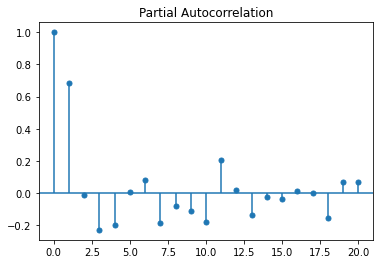

In [714]:
pm.plot_pacf(dif1['zri'], lags = 20)

In [715]:
model = pm.arima.auto_arima(df3['zri'], start_p=0, start_q=0, m=12, test = 'kpss')
model

ARIMA(order=(1, 1, 0), scoring_args={}, seasonal_order=(0, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [668]:
model.order # model sees that you have to set d=1

(1, 1, 0)

In [669]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   83
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -274.218
Date:                Mon, 13 Sep 2021   AIC                            552.436
Time:                        18:17:27   BIC                            557.250
Sample:                             0   HQIC                           554.369
                                 - 83                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7734      0.065     11.850      0.000       0.645       0.901
sigma2        46.4762      5.266      8.825      0.000      36.155      56.798
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):                14.99
Prob(Q):                              0.61   Prob(JB):                         0.00
Heteroskedasticity (H):               0.53   Skew:                             0.78
Prob(H) (two-sided):                  0.10   Kurtosis:                         4.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [675]:
true = test[(test['zip']=='27518') & (test['year']==2018)]

In [676]:
def forecast_one_step():
    fc, conf_int = model.predict(n_periods=1, return_conf_int=True)
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0])

pred = []
confidence_intervals = []

for new_ob in true['zri']:
    fc, conf = forecast_one_step()
    pred.append(fc)
    confidence_intervals.append(conf)

    # Updates the existing model with the prediction it just made
    model.update(new_ob)

In [677]:
pred

[1314.2266327373168,
 1329.1790054676371,
 1331.857555982962,
 1317.4024282615972,
 1307.852305327983,
 1308.70211818503,
 1319.8184309402857,
 1340.763077444752,
 1344.1198420064557,
 1366.3642323405622,
 1366.3511760882157,
 1376.9029060366724]

In [678]:
fig = px.line(df3, x = 'datetime', y = 'zri')
fig.add_trace(go.Line(x = true['datetime'], y = true['zri'], mode = 'lines'))
fig.add_trace(go.Line(x = true['datetime'], y = pred, mode = 'lines'))
fig.add_trace(go.Line(x = true['datetime'], y = np.asarray(confidence_intervals)[:,0], mode = 'lines'))
fig.add_trace(go.Line(x = true['datetime'], y = np.asarray(confidence_intervals)[:,1], mode = 'lines', fill = 'tonexty'))

C:\Users\fayma\anaconda3\envs\env1\lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [562]:
np.asarray(confidence_intervals)

array([[1300.86488029, 1327.58838519],
       [1315.76422606, 1342.59378488],
       [1318.52018564, 1345.19492632],
       [1303.97852827, 1330.82632826],
       [1294.48758926, 1321.21702139],
       [1295.39752162, 1322.00671475],
       [1306.5013862 , 1333.13547568],
       [1327.35500942, 1354.17114547],
       [1330.77341218, 1357.46627183],
       [1352.9401345 , 1379.78833018],
       [1352.95413187, 1379.74822031],
       [1363.55823915, 1390.24757292]])

In [614]:
print(f"Mean squared error: {mean_squared_error(true['zri'], pred)}")
print(f"SMAPE: {smape(true['zri'], pred)}")
# smape of 0 is perfect accuracy, lower smape is better

Mean squared error: 49.94582797995259
SMAPE: 0.47008878122326675
